In [5]:
compare = "Max_temperature" # file name (in the folder "data/model_comparison") of the comparison to be made
consider_models = "all" # list of int (from 0 to number of models - 1) or "all"

Comparing models:
 - 0: ./archives/2023-03-29_46185e4/21/model_details.json
 - 1: ./archives/2023-03-29_46185e4/23/model_details.json
 - 2: ./archives/2023-03-29_46185e4/24/model_details.json
 - 3: ./archives/2023-03-29_46185e4/25/model_details.json
 - 4: ./archives/2023-03-29_46185e4/27/model_details.json


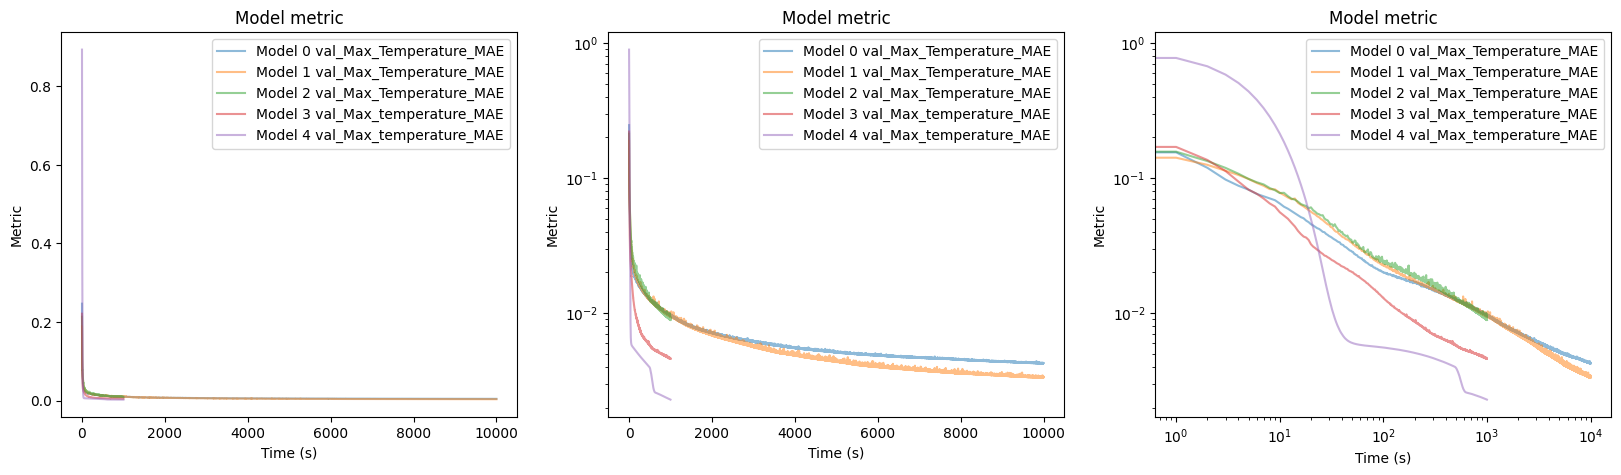

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json
import pandas as pd
from scipy.signal import savgol_filter
import yaml

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

source = f"data/model_comparison/{compare}.yml"

with open(source) as f:
    archives = yaml.safe_load(f)

print("Comparing models:")
for model_number, archive in enumerate(archives):

    if consider_models != "all" and model_number not in consider_models:
        continue

    with open(f'{archive}/history.pickle', "rb") as file_pi:
        history = pickle.load(file_pi)
    
    with open(f'{archive}/model_details.json') as file:
        details = json.load(file)

    epochs = details['epochs']
    training_time = details['training_time']
    summary = details['summary']
    score = details['score']
    metrics = details['metrics']

    time_range = np.linspace(0, training_time, epochs, endpoint=True)

    print(f" - {model_number}: {archive}/model_details.json")

    for key in history.keys():
        if (key.startswith('val_')) and (not key.endswith('_loss')):
            if (compare.startswith("detailed/")) or (compare.lower() in key.lower()):
                for ax in axs:
                    curve = history[key] # savgol_filter(history[key], 11, 1)
                    ax.plot(curve, alpha=0.5, label=f"Model {model_number} {key.replace(' ', '')}")

for ax in axs:
    ax.set_title(f'Model metric')
    ax.set_ylabel('Metric')
    ax.set_xlabel('Time (s)')
    ax.legend()

axs[1].set_yscale('log')
axs[2].set_xscale('log')
axs[2].set_yscale('log')

plt.show()

In [7]:
def print_model_details(id):

    if id >= len(archives):
        print(f"ID must be included in [0, {len(archives)-1}]")
        return

    with open(f'{archives[id]}/model_details.json') as file:
        details = json.load(file)
    print(details['summary'])
    print("")
    print("Optimizer:", details['optimizer'])
    if isinstance(details['loss'], list):
        print("Loss:\n -", "\n - ".join(details['loss']))
    else:
        print("Loss:", details['loss'])
    print("Metrics:\n -", "\n - ".join(details['metrics']))
    print("")
    print("Epochs:", details['epochs'])
    print("Batch size:", details['batch_size'])
    print("")
    print(f"Training time: {int(details['training_time']//60)}m {details['training_time']%60:.2f}s" )
    print("Score:\n -", "\n - ".join([f"{i:.2e}" for i in details['score']]))
    print("")
    print("Dataset size:", details['dataset_size'])
    print("Validation fraction:", int(details['valid_frac'] * 100), "%")
    print("Test fraction:", int(details['test_frac'] * 100), "%")
    print("")
    print("Path:", archives[id])
    print("")
    if "inputs" in details:
        print("Inputs:\n -", "\n - ".join(details['inputs']))
    if "outputs" in details:
        print("Outputs:\n -", "\n - ".join(details['outputs']))


In [8]:
print_model_details(4)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Dust map (InputLayer)          [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 Dust_map_conv_1 (Conv2D)       (None, 64, 64, 16)   1040        ['Dust map[0][0]']               
                                                                                                  
 Dust_map_max_pool_1 (MaxPoolin  (None, 16, 16, 16)  0           ['Dust_map_conv_1[0][0]']        
 g2D)                                                                                             
                                                                                                  
 Dust_map_conv_2 (Conv2D)       (None, 16, 16, 8)    2056        ['Dust_map_max_pool_1[0][0]